In [12]:
%config InlineBackend.figure_formats = ['svg']

## 线性回归

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
data = pd.DataFrame({
    "marks": [34, 51, 64, 88, 95, 99],
    "salary": [3400, 2900, 4250, 5000, 5100, 5600]}
)
data

,marks,salary
0,34,3400
1,51,2900
2,64,4250
3,88,5000
4,95,5100
5,99,5600


In [15]:
X = data[['marks']].values
y = data['salary'].values
X, y

(array([[34],
        [51],
        [64],
        [88],
        [95],
        [99]]),
 array([3400, 2900, 4250, 5000, 5100, 5600]))

In [16]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [17]:
reg.predict([[70]])

array([4306.8224479])

In [18]:
reg.predict([[100],[50],[80]])

array([5422.45511864, 3563.06733407, 4678.70000481])

In [19]:
reg.coef_, reg.intercept_

(array([37.18775569]), 1703.6795495018541)

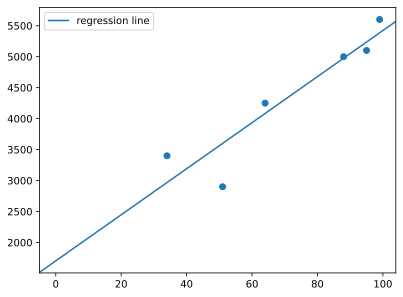

In [20]:
fig, ax = plt.subplots()
plt.scatter(X, y)
ax.axline((0, reg.intercept_), slope=reg.coef_, label='regression line')
ax.legend()
plt.show()

## Evaluation

In [21]:
results_table = pd.DataFrame(data=X, columns=['Marks'])
results_table['Predicted Salary'] = reg.predict(X)
results_table['Actual Salary'] = y
results_table['Error'] = results_table['Actual Salary'] - \
    results_table['Predicted Salary']
results_table['Error Squared'] = results_table['Error'] * \
    results_table['Error']
results_table

,Marks,Predicted Salary,Actual Salary,Error,Error Squared
0,34,2968.063243,3400,431.936757,186569.362040
1,51,3600.255090,2900,-700.255090,490357.190739
2,64,4083.695914,4250,166.304086,27657.049103
3,88,4976.202050,5000,23.797950,566.342408
4,95,5236.516340,5100,-136.516340,18636.711137
5,99,5385.267363,5600,214.732637,46110.105415


In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print(mean_squared_error(
    results_table['Actual Salary'],
    results_table['Predicted Salary']))
print(np.sqrt(mean_squared_error(
    results_table['Actual Salary'],
    results_table['Predicted Salary'])))
print(mean_absolute_error(
    results_table['Actual Salary'],
    results_table['Predicted Salary']))


128316.12680688586
358.2124045966106
278.9238099821918
